<a href="https://colab.research.google.com/github/Ravikumar10593-hub/15daybootcamp/blob/main/Day4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("/content/titanic.xlsx")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [24]:
#checking missing value
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

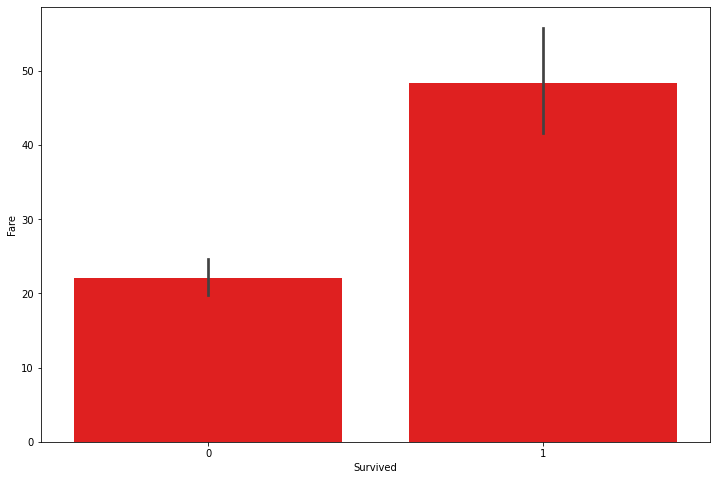

In [17]:
#fare Vs survived
plt.figure(figsize=(12,8))
sns.barplot(x='Survived',y='Fare',data=data,color='red')

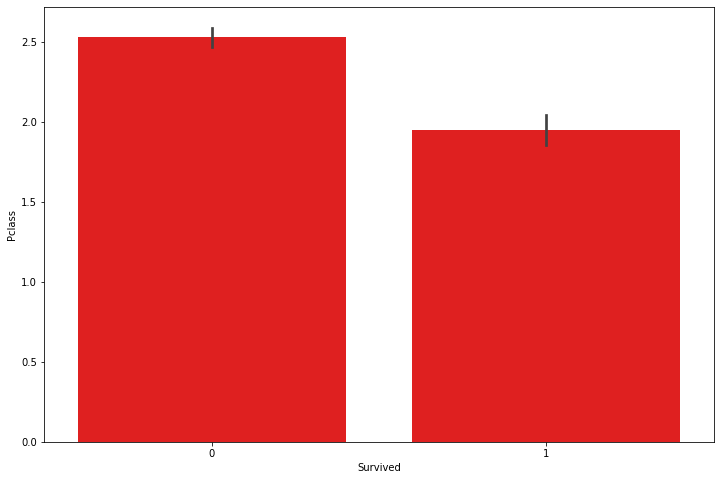

In [19]:
#pclass vs survived
plt.figure(figsize=(12,8))
sns.barplot(x='Survived',y='Pclass',data=data,color='red')

In [20]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [21]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

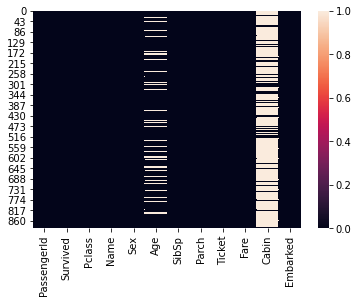

In [27]:
#create a heat map

sns.heatmap(data.isnull())

In [6]:
data.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [30]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [32]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
#handiling missing value in "Embarked"
data['Embarked'].fillna('S',inplace=True)

In [36]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [39]:
#descr age feature
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


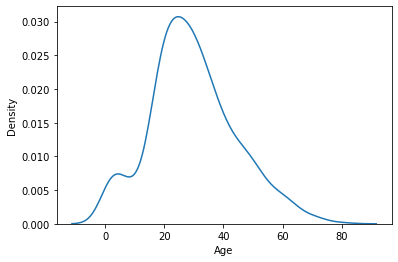

In [43]:
#dist plot of our datset

sns.distplot(data['Age'],hist=False)

In [44]:
data.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [3]:
#null vlaues in age column
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
#data transf using label encoder and one hot encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Sex'])
data["Gender"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Gender, Length: 891, dtype: int64

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
data['sex']=data['Sex'].map({'male': 0 ,'female' : 1})

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [15]:
data.drop('Sex',axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,sex
0,0,3,22.000000,1,0,7.2500,S,0
1,1,1,38.000000,1,0,71.2833,C,1
2,1,3,26.000000,0,0,7.9250,S,1
3,1,1,35.000000,1,0,53.1000,S,1
4,0,3,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,0
887,1,1,19.000000,0,0,30.0000,S,1
888,0,3,29.699118,1,2,23.4500,S,1
889,1,1,26.000000,0,0,30.0000,C,0


In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(data[['Embarked']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [19]:
df_1=pd.get_dummies(data['Embarked'],drop_first=True)

In [31]:
df_1

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [25]:
data.drop('Sex',axis=1,inplace=True)

In [26]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


In [29]:
df_2=pd.concat([data,df_1],axis=1)

In [30]:
df_2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Q,S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


In [33]:
X=df_2.drop('Survived',axis=1)
y=df_2['Survived']

In [35]:
from sklearn.model_selection import train_test_split

X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
#test
predict=dtc.predict(X_test)
print(predict)

[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1
 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0
 0]


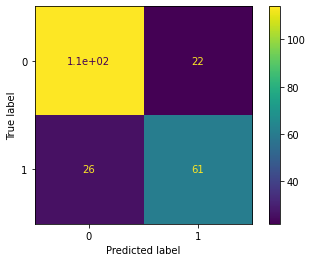

In [41]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
cm= plot_confusion_matrix(dtc,X_test,y_test)

In [45]:
accuracy_score(y_test,predict)

0.7847533632286996